In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Load the data
data = pd.read_excel(r'C:\Users\amani\Documents\++++Projects++++\Entertainer-Data-Analysis\Dataset\Entertainer - Final.xlsx')
data.head()

,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Year of Death,Award Won from Breakthrough,Total Awards won,Total Nominees,Profession,Oscar Won,Grammy Won,Emmy Won,Other Awards
0,Adele,F,1988,2008,19,2009.0,2016,NaN,Grammy,32,64,Singer,1,15,0,16
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,NaN,Oscar,58,174,Actor,1,0,0,57
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,NaN,No Award,29,67,Singer,0,20,0,9
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0,No Award,34,57,Actor,2,0,1,31
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,NaN,Emmy,39,79,Actor,0,2,5,32


{'M': np.int64(50), 'F': np.int64(20)}


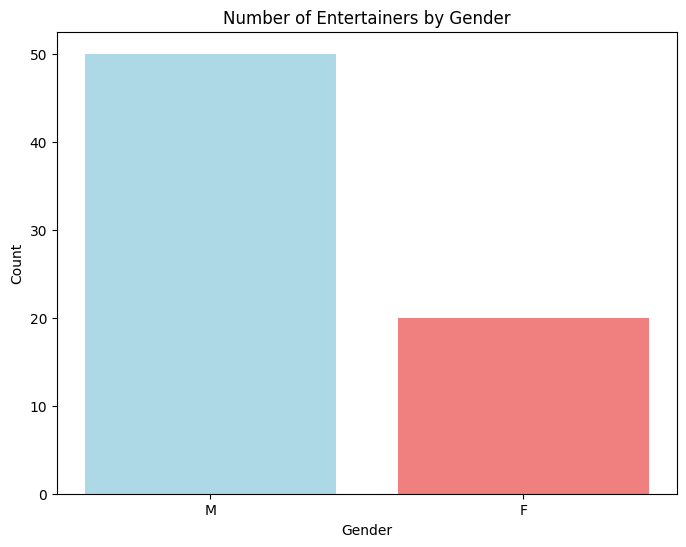

In [24]:
# 1. How many male and female entertainers are there?
unique_genders = data['Gender (traditional)'].value_counts().index
gender_counts = data['Gender (traditional)'].value_counts().values

gender_count_dict = dict(zip(unique_genders, gender_counts))
print(gender_count_dict)

plt.figure(figsize=(8, 6))
plt.bar(gender_count_dict.keys(), gender_count_dict.values(), color=['lightblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Entertainers by Gender')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Number of entertainers with a breakthrough in 2000 or later: 4


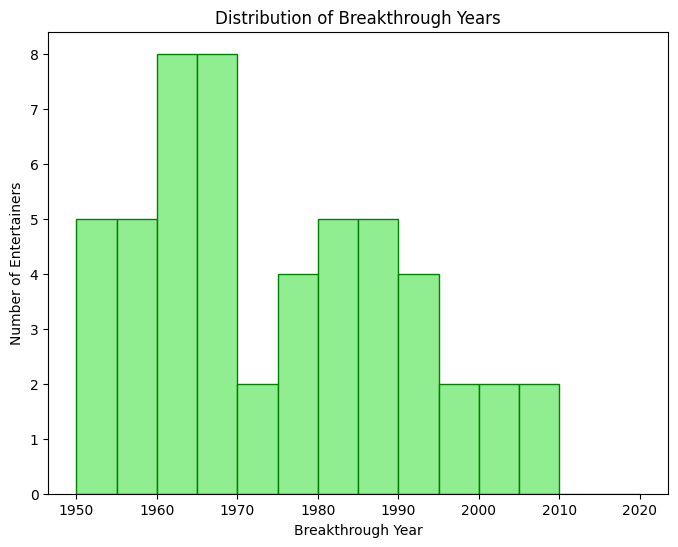

In [25]:
# 2. How many Entertainers had a Breakthrough in the year 2000 or later?
breakthrough_years = data['Year of Breakthrough/#1 Hit/Award Nomination'].to_numpy()
recent_breakthroughs = breakthrough_years >= 2000
num_recent_breakthroughs = np.sum(recent_breakthroughs)
print(f"Number of entertainers with a breakthrough in 2000 or later: {num_recent_breakthroughs}")

plt.figure(figsize=(8, 6))
plt.hist(breakthrough_years, bins=range(1950, 2025, 5),edgecolor='green', color='lightgreen')
plt.xlabel('Breakthrough Year')
plt.ylabel('Number of Entertainers')
plt.title('Distribution of Breakthrough Years')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
# 3. Who is the oldest and youngest Entertainer in the dataset?
birth_years = data['Birth Year'].to_numpy()
oldest_index = np.argmin(birth_years)
youngest_index = np.argmax(birth_years)

oldest_entertainer = data.loc[oldest_index, 'Entertainer']
youngest_entertainer = data.loc[youngest_index, 'Entertainer']

print(f"Oldest Entertainer: {oldest_entertainer}")
print(f"Youngest Entertainer: {youngest_entertainer}")

Oldest Entertainer: Charlie Chaplin
Youngest Entertainer: Adele


Number of entertainers who have won an Oscar: 30


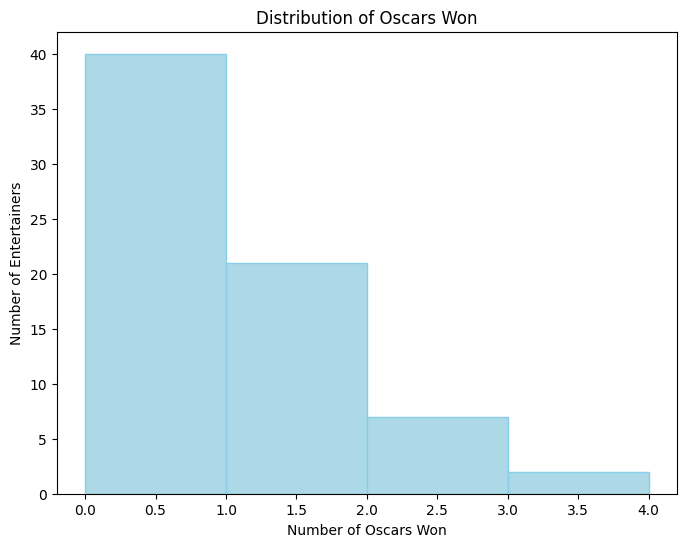

In [27]:
# 4. How many Entertainers have won an Oscar?
oscar_won = data['Oscar Won'].to_numpy()
num_oscar_winners = np.sum(oscar_won > 0)
print(f"Number of entertainers who have won an Oscar: {num_oscar_winners}")

plt.figure(figsize=(8, 6))
plt.hist(oscar_won, bins=range(0, int(max(oscar_won)) + 1), edgecolor='skyblue', color='lightblue')
plt.xlabel('Number of Oscars Won')
plt.ylabel('Number of Entertainers')
plt.title('Distribution of Oscars Won')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
# 5. How many Entertainers have won awards other than Oscar, Grammy, or Emmy?
other_awards = data['Other Awards '].to_numpy()
num_other_award_winners = np.sum(other_awards > 0)
print(f"Number of entertainers who have won other awards: {num_other_award_winners}")

Number of entertainers who have won other awards: 68


Average number of awards won by entertainers: 33.56


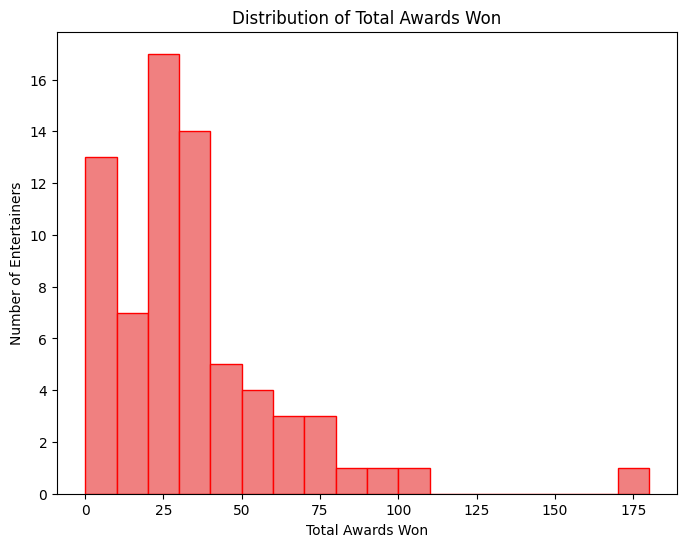

In [29]:
# 6. What is the average number of awards won by Entertainers?
awards_won = data['Total Awards won'].to_numpy()
average_awards_won = np.mean(awards_won)
print(f"Average number of awards won by entertainers: {average_awards_won:.2f}")

plt.figure(figsize=(8, 6))
plt.hist(awards_won, bins=range(0, int(max(awards_won)) + 10, 10), edgecolor='red', color='lightcoral')
plt.xlabel('Total Awards Won')
plt.ylabel('Number of Entertainers')
plt.title('Distribution of Total Awards Won')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [30]:

# 7. How many entertainers have received an Oscar, a Grammy, and an Emmy?
oscar_won = data['Oscar Won'].to_numpy()
grammy_won = data['Grammy Won'].to_numpy()
emmy_won = data['Emmy Won'].to_numpy()
triple_award_winners = np.sum((oscar_won > 0) & (grammy_won > 0) & (emmy_won > 0))
print(f"Number of entertainers with an Oscar, a Grammy, and an Emmy: {triple_award_winners}")

Number of entertainers with an Oscar, a Grammy, and an Emmy: 0


In [31]:
# 8. What is the percentage of Entertainers who have won an Award from their Breakthrough?
award_won_from_breakthrough = data['Award Won from Breakthrough'].to_numpy()
filtered_awards = award_won_from_breakthrough[~np.isin(award_won_from_breakthrough, ['No Award', 'Other'])]
percentage = (len(filtered_awards) / len(data)) * 100
print(f"Percentage of entertainers who have won an award from their breakthrough: {percentage:.2f}%")

Percentage of entertainers who have won an award from their breakthrough: 25.71%


In [32]:
# 9. How many Entertainers have received a total of more than 50 awards?
total_awards = data['Total Awards won'].to_numpy()
num_award_winners_over_50 = np.sum(total_awards > 50)
print(f"Number of entertainers with more than 50 awards: {num_award_winners_over_50}")

Number of entertainers with more than 50 awards: 14


In [33]:
# 10. Determine the number of Entertainers who have not received awards in the dataset.
num_no_awards = np.sum(total_awards == 0)
print(f"Number of entertainers with no awards: {num_no_awards}")

Number of entertainers with no awards: 0


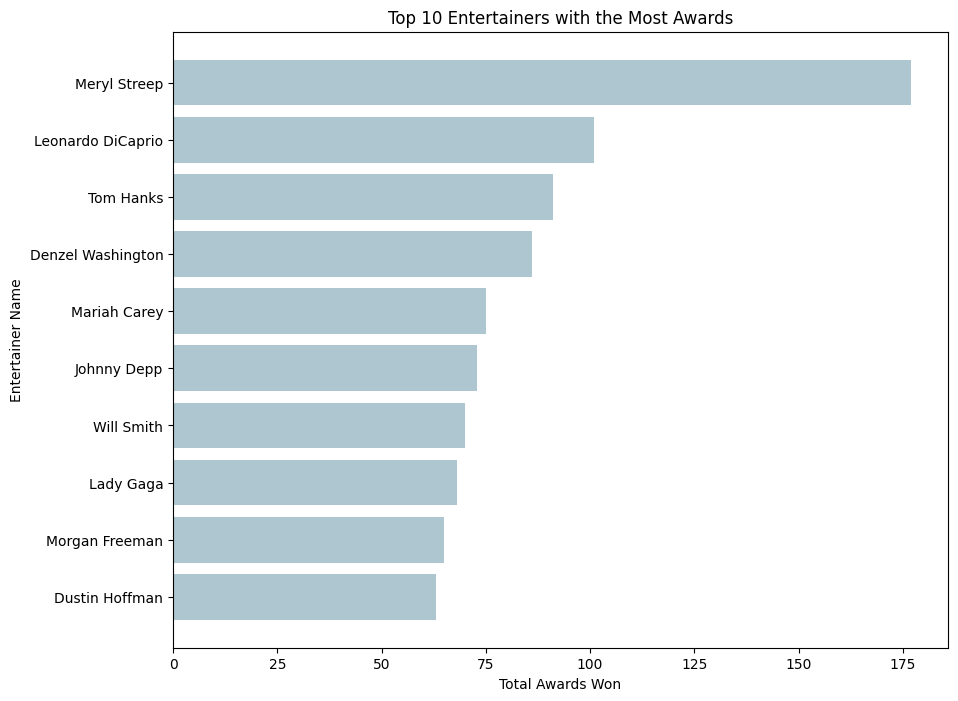

In [34]:
# 11. Who are the top 10 entertainers with the most awards?
sorted_data = data.sort_values(by='Total Awards won', ascending=False)
top_10 = sorted_data.head(10)

plt.figure(figsize=(10, 8))
plt.barh(top_10['Entertainer'], top_10['Total Awards won'], color='#AEC6CF')  # Using hex code for pastel blue
plt.xlabel('Total Awards Won')
plt.ylabel('Entertainer Name')
plt.title('Top 10 Entertainers with the Most Awards')
plt.gca().invert_yaxis()  # To display the highest awards at the top
#plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

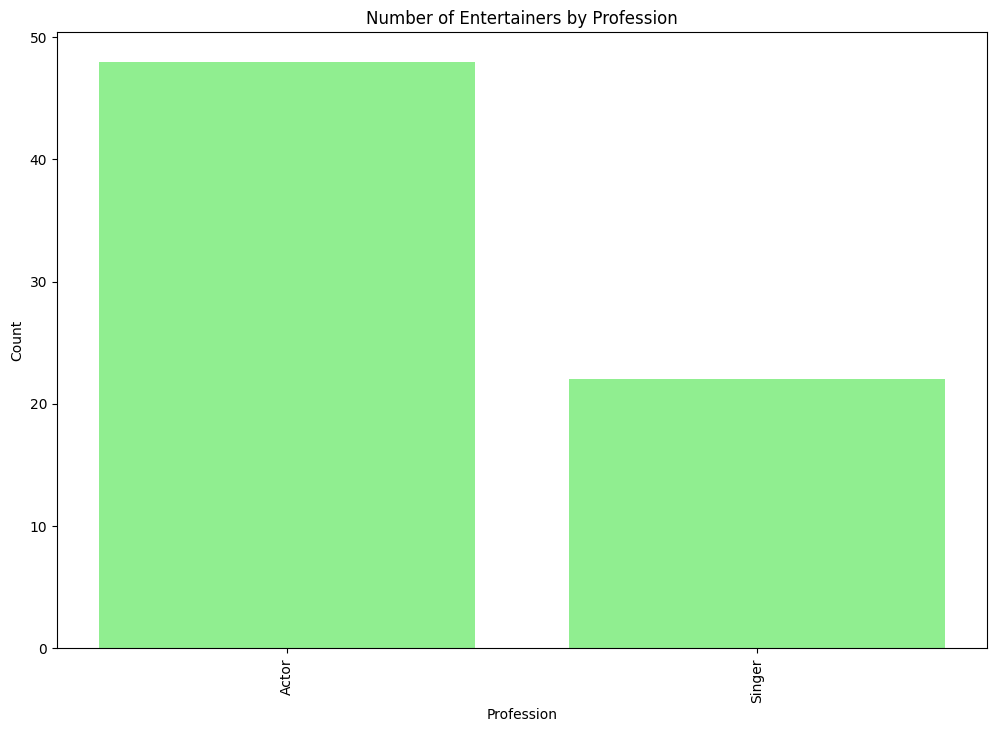

In [35]:
# 12. How many entertainers belong to each profession category?
professions = data['Profession'].to_numpy()
unique_professions, profession_counts = np.unique(professions, return_counts=True)
plt.figure(figsize=(12, 8))
plt.bar(unique_professions, profession_counts, color='lightgreen')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Number of Entertainers by Profession')
plt.xticks(rotation=90)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


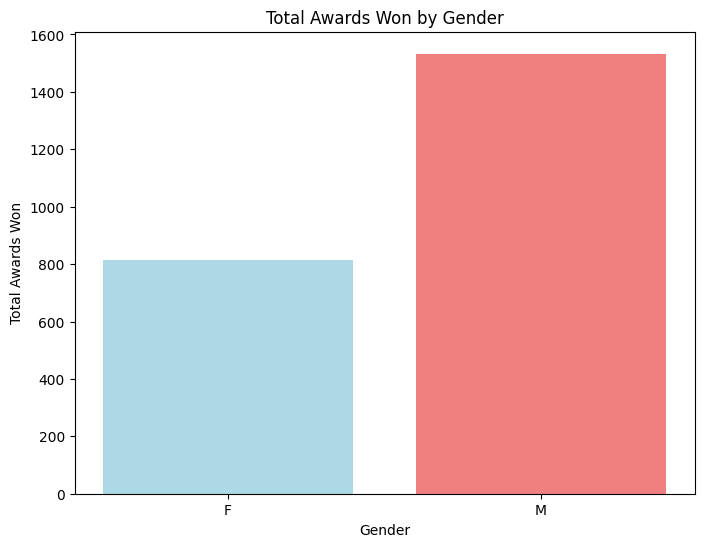

In [36]:

# 13. Distribution of Awards Won by Gender
gender = data['Gender (traditional)'].to_numpy()
gender_awards = data.groupby('Gender (traditional)')['Total Awards won'].sum()

plt.figure(figsize=(8, 6))
plt.bar(gender_awards.index, gender_awards.values, color=['lightblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Total Awards Won')
plt.title('Total Awards Won by Gender')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

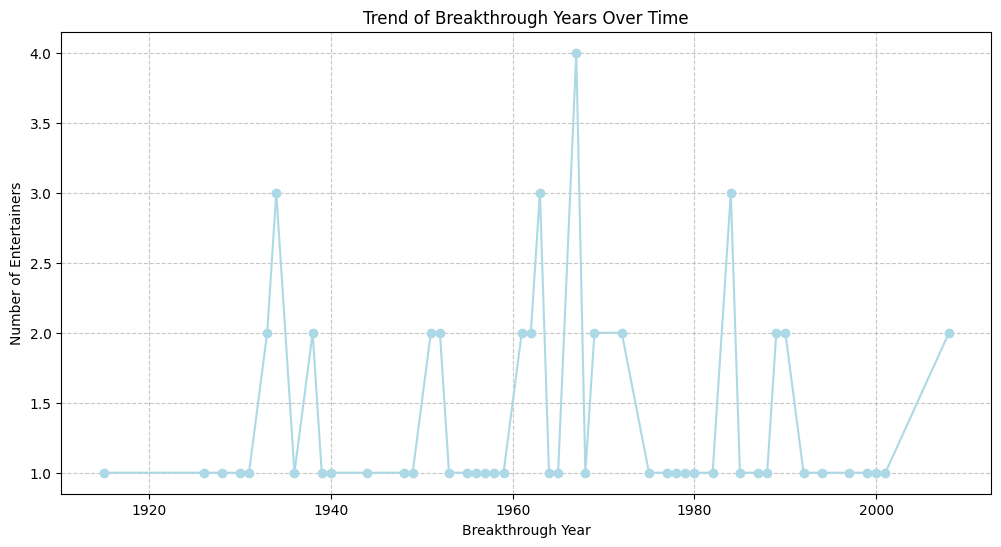

In [37]:
# 14. Trend of Breakthrough Years Over Time
plt.figure(figsize=(12, 6))

# Get unique years and their counts
unique_years, year_counts = np.unique(breakthrough_years, return_counts=True)

# Plotting
plt.plot(unique_years, year_counts, marker='o', linestyle='-', color='lightblue')
plt.xlabel('Breakthrough Year')
plt.ylabel('Number of Entertainers')
plt.title('Trend of Breakthrough Years Over Time')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

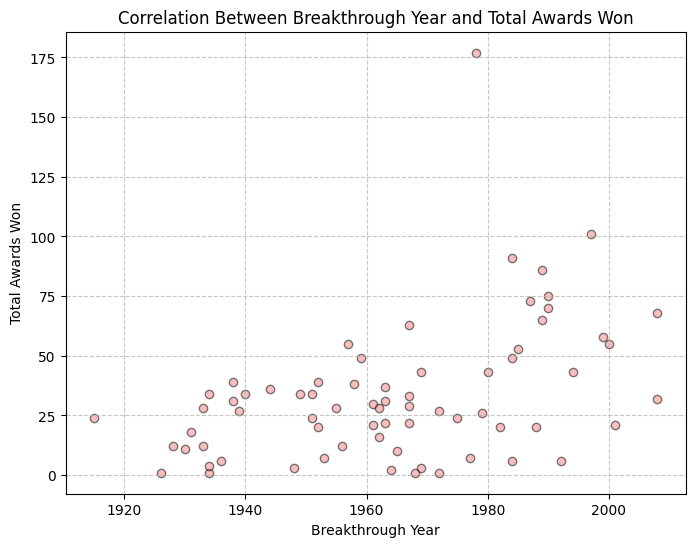

In [38]:
# 15. Correlation Between Awards Won and Breakthrough Year
plt.figure(figsize=(8, 6))
plt.scatter(breakthrough_years, awards_won, alpha=0.5, color='lightcoral', edgecolor='black')
plt.xlabel('Breakthrough Year')
plt.ylabel('Total Awards Won')
plt.title('Correlation Between Breakthrough Year and Total Awards Won')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


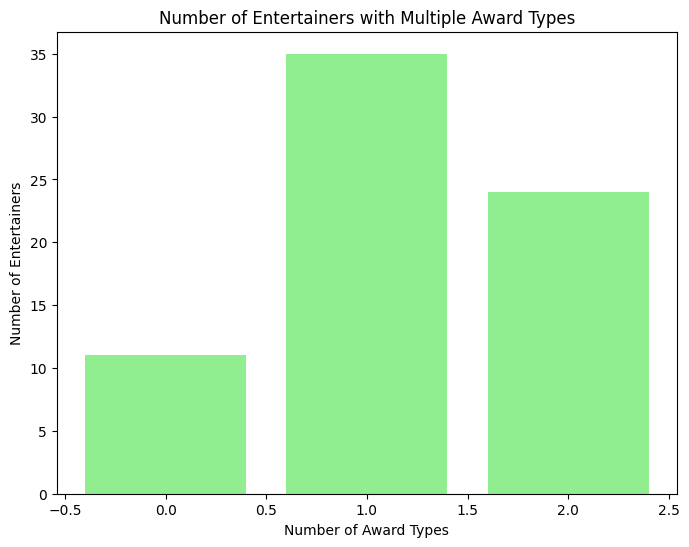

In [39]:
# 16. Number of Entertainers with Multiple Awards
award_types = ['Oscar Won', 'Grammy Won', 'Emmy Won']
data['Multiple Awards'] = data[award_types].gt(0).sum(axis=1)
multiple_awards_counts = data['Multiple Awards'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(multiple_awards_counts.index, multiple_awards_counts.values, color='lightgreen')
plt.xlabel('Number of Award Types')
plt.ylabel('Number of Entertainers')
plt.title('Number of Entertainers with Multiple Award Types')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()